In [48]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
train_df=pd.read_csv('train.csv')

In [50]:
train_df.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [51]:
train_df['image_id']=train_df['image_id']+'.jpg'
train_df.tail()

,image_id,breed
5503,5f0c970adf.jpg,lampropeltis-triangulum
5504,f6a4287fac.jpg,pantherophis-alleghaniensis
5505,d3c10e63e1.jpg,thamnophis-sirtalis
5506,61ef50879c.jpg,pituophis-catenifer
5507,4791d8bf9a.jpg,lampropeltis-triangulum


In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
training_set = train_datagen.flow_from_dataframe(train_df,directory='train/',x_col='image_id',
                                               y_col='breed',target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5508 validated image filenames belonging to 35 classes.


In [54]:
IMAGE_SIZE = [224, 224]

In [55]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [56]:
for layer in vgg.layers:
  layer.trainable = False

In [57]:
x = Flatten()(vgg.output)
prediction = Dense(35, activation='softmax')(x)

In [58]:
model = Model(inputs=vgg.input, outputs=prediction)

In [59]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
r = model.fit_generator(
  training_set,
  epochs=20,
  steps_per_epoch=100
)

Epoch 1/20
100/100 [==============================] - 997s 10s/step - loss: 4.0955 - accuracy: 0.1078
Epoch 2/20
100/100 [==============================] - 854s 9s/step - loss: 2.7624 - accuracy: 0.3430
Epoch 3/20
100/100 [==============================] - 855s 9s/step - loss: 2.0430 - accuracy: 0.4725
Epoch 4/20
100/100 [==============================] - 831s 8s/step - loss: 1.5667 - accuracy: 0.5917
Epoch 5/20
100/100 [==============================] - 847s 8s/step - loss: 1.2498 - accuracy: 0.6794
Epoch 6/20
100/100 [==============================] - 847s 8s/step - loss: 0.9110 - accuracy: 0.7709
Epoch 7/20
100/100 [==============================] - 833s 8s/step - loss: 0.7990 - accuracy: 0.8061
Epoch 8/20
100/100 [==============================] - 823s 8s/step - loss: 0.6129 - accuracy: 0.8544
Epoch 9/20
100/100 [==============================] - 834s 8s/step - loss: 0.5006 - accuracy: 0.8931
Epoch 10/20
100/100 [==============================] - 851s 9s/step - loss: 0.4133 - accur

In [62]:
model.save('vgg_16.h5')

In [63]:
test_df=pd.read_csv('test.csv')
test_df.head()

,image_id
0,7ede553357
1,3500b219e4
2,d43a78d6d9
3,1f36f26994
4,8cb85fc58e


In [64]:
test_df['image_id']=test_df['image_id']+'.jpg'
test_df.tail()

,image_id
2356,93e591cb23.jpg
2357,68a603b39d.jpg
2358,4f472510f3.jpg
2359,d6884444ae.jpg
2360,c0fa7df5de.jpg


In [70]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = train_datagen.flow_from_dataframe(test_df,directory='test/',x_col='image_id'
                                               ,target_size = (224, 224),
                                                 batch_size = 32,class_mode = None)

Found 2361 validated image filenames.


In [72]:
y_pred=model.predict_generator(test_set,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
74/74 [==============================] - 685s 9s/step


In [73]:
y_pred.shape

(2361, 35)

In [74]:
y_pred_2=np.argmax(y_pred,axis=1)

In [76]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred_2]

In [77]:
predictions

['thamnophis-sirtalis',
 'heterodon-platirhinos',
 'crotalus-atrox',
 'pituophis-catenifer',
 'thamnophis-radix',
 'diadophis-punctatus',
 'rhinocheilus-lecontei',
 'crotalus-horridus',
 'crotalus-atrox',
 'thamnophis-radix',
 'pituophis-catenifer',
 'thamnophis-sirtalis',
 'diadophis-punctatus',
 'crotalus-atrox',
 'crotalus-horridus',
 'thamnophis-sirtalis',
 'pituophis-catenifer',
 'pituophis-catenifer',
 'crotalus-horridus',
 'storeria-dekayi',
 'crotalus-atrox',
 'pituophis-catenifer',
 'thamnophis-sirtalis',
 'pituophis-catenifer',
 'diadophis-punctatus',
 'thamnophis-sirtalis',
 'storeria-dekayi',
 'pantherophis-obsoletus',
 'storeria-dekayi',
 'pituophis-catenifer',
 'crotalus-horridus',
 'pantherophis-alleghaniensis',
 'pantherophis-spiloides',
 'masticophis-flagellum',
 'thamnophis-sirtalis',
 'nerodia-sipedon',
 'pituophis-catenifer',
 'lampropeltis-californiae',
 'thamnophis-sirtalis',
 'pituophis-catenifer',
 'crotalus-scutulatus',
 'pantherophis-alleghaniensis',
 'panther

In [78]:
test_image=test_df['image_id'].values

In [79]:
data=pd.DataFrame((zip(test_image,predictions)),columns=['image_id','breed'])

In [81]:
data.head()

,image_id,breed
0,7ede553357.jpg,thamnophis-sirtalis
1,3500b219e4.jpg,heterodon-platirhinos
2,d43a78d6d9.jpg,crotalus-atrox
3,1f36f26994.jpg,pituophis-catenifer
4,8cb85fc58e.jpg,thamnophis-radix


In [82]:
data.to_csv('output.csv',index=False)

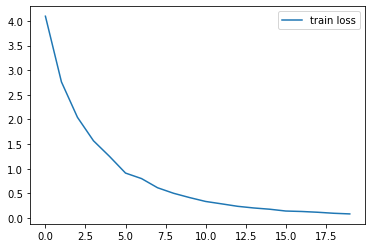

<Figure size 432x288 with 0 Axes>

In [84]:
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



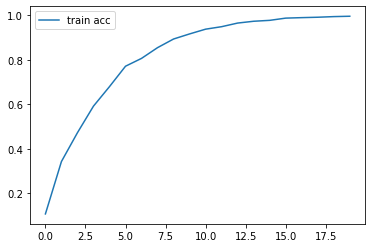

<Figure size 432x288 with 0 Axes>

In [86]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [92]:
from keras.preprocessing import image
test_image = image.load_img('train/2b71eae54c.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [100]:
result=model.predict(test_image)


In [93]:
training_set.class_indices

{'agkistrodon-contortrix': 0,
 'agkistrodon-piscivorus': 1,
 'coluber-constrictor': 2,
 'crotalus-atrox': 3,
 'crotalus-horridus': 4,
 'crotalus-ruber': 5,
 'crotalus-scutulatus': 6,
 'crotalus-viridis': 7,
 'diadophis-punctatus': 8,
 'haldea-striatula': 9,
 'heterodon-platirhinos': 10,
 'lampropeltis-californiae': 11,
 'lampropeltis-triangulum': 12,
 'masticophis-flagellum': 13,
 'natrix-natrix': 14,
 'nerodia-erythrogaster': 15,
 'nerodia-fasciata': 16,
 'nerodia-rhombifer': 17,
 'nerodia-sipedon': 18,
 'opheodrys-aestivus': 19,
 'pantherophis-alleghaniensis': 20,
 'pantherophis-emoryi': 21,
 'pantherophis-guttatus': 22,
 'pantherophis-obsoletus': 23,
 'pantherophis-spiloides': 24,
 'pantherophis-vulpinus': 25,
 'pituophis-catenifer': 26,
 'rhinocheilus-lecontei': 27,
 'storeria-dekayi': 28,
 'storeria-occipitomaculata': 29,
 'thamnophis-elegans': 30,
 'thamnophis-marcianus': 31,
 'thamnophis-proximus': 32,
 'thamnophis-radix': 33,
 'thamnophis-sirtalis': 34}

In [101]:
np.argmax(result)

28